# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Library untuk evaluasi
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset
df = pd.read_csv('../WineQT_raw/WineQT.csv')

# Menampilkan 5 baris pertama
print("=" * 60)
print("PREVIEW DATA (5 BARIS PERTAMA)")
print("=" * 60)
df.head()

PREVIEW DATA (5 BARIS PERTAMA)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Informasi dasar dataset
print("=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nNama kolom: {list(df.columns)}")
print("\n" + "=" * 60)
print("TIPE DATA SETIAP KOLOM")
print("=" * 60)
print(df.dtypes)

INFORMASI DATASET
Jumlah baris: 1143
Jumlah kolom: 13

Nama kolom: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

TIPE DATA SETIAP KOLOM
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [4]:
# Statistik deskriptif
print("=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
df.describe()

STATISTIK DESKRIPTIF


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Cek missing values
print("=" * 60)
print("CEK MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

CEK MISSING VALUES
                      Missing Values  Percentage (%)
fixed acidity                      0             0.0
volatile acidity                   0             0.0
citric acid                        0             0.0
residual sugar                     0             0.0
chlorides                          0             0.0
free sulfur dioxide                0             0.0
total sulfur dioxide               0             0.0
density                            0             0.0
pH                                 0             0.0
sulphates                          0             0.0
alcohol                            0             0.0
quality                            0             0.0
Id                                 0             0.0

Total missing values: 0


In [7]:
# Cek data duplikat
print("=" * 60)
print("CEK DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
print(f"Persentase duplikat: {(duplicates/len(df))*100:.2f}%")

CEK DATA DUPLIKAT
Jumlah baris duplikat: 0
Persentase duplikat: 0.00%


DISTRIBUSI QUALITY (TARGET)
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

Jumlah kelas unik: 6


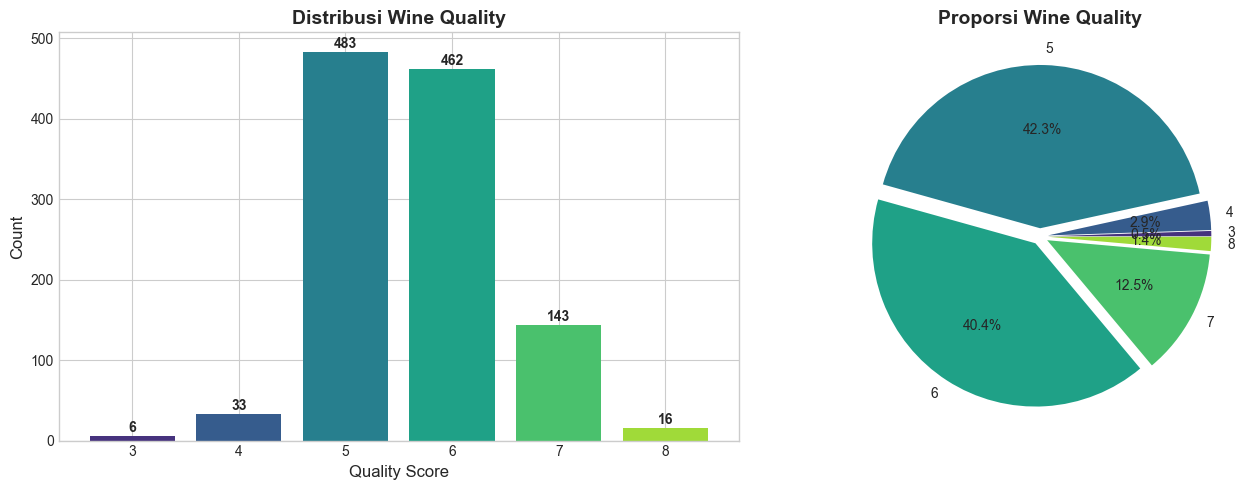

In [8]:
# Distribusi kelas target
print("=" * 60)
print("DISTRIBUSI QUALITY (TARGET)")
print("=" * 60)
quality_dist = df['quality'].value_counts().sort_index()
print(quality_dist)
print(f"\nJumlah kelas unik: {df['quality'].nunique()}")

# Visualisasi distribusi quality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = sns.color_palette('viridis', len(quality_dist))
axes[0].bar(quality_dist.index.astype(str), quality_dist.values, color=colors)
axes[0].set_xlabel('Quality Score', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribusi Wine Quality', fontsize=14, fontweight='bold')
for i, v in enumerate(quality_dist.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(quality_dist.values, labels=quality_dist.index, autopct='%1.1f%%', 
            colors=colors, explode=[0.05]*len(quality_dist))
axes[1].set_title('Proporsi Wine Quality', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

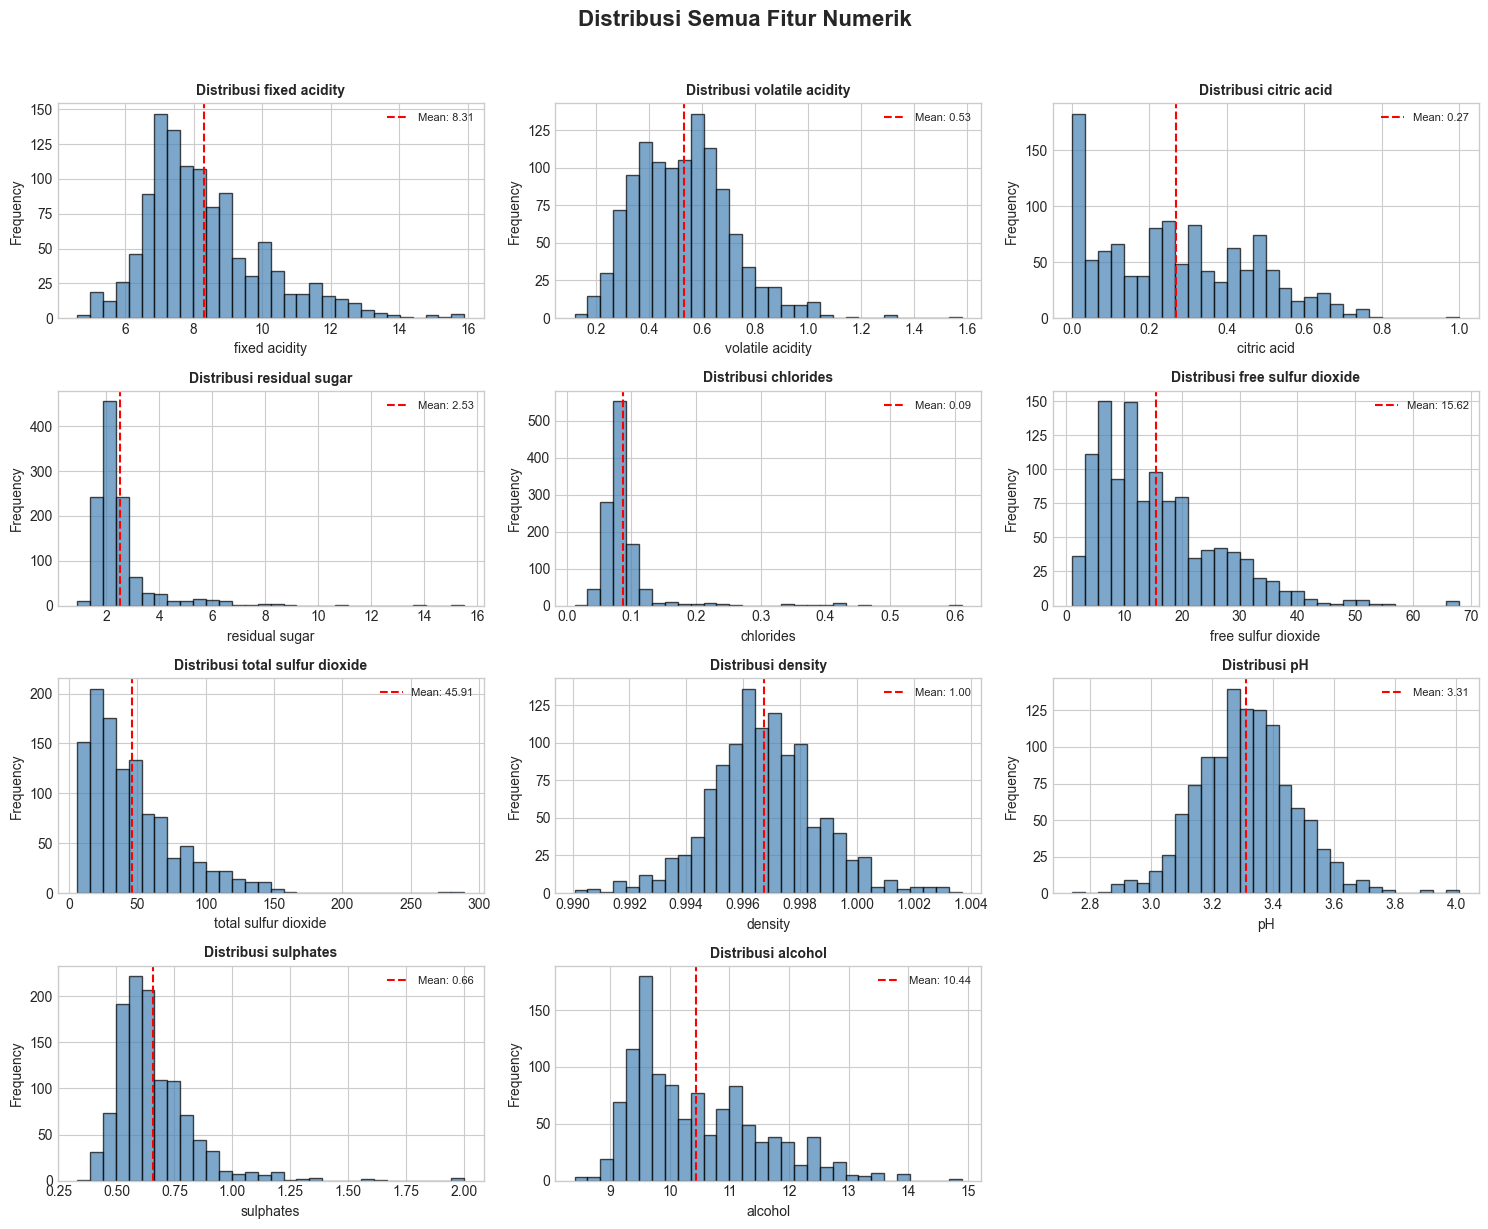

In [9]:
# Fitur numerik (exclude Id dan quality)
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

# Histogram semua fitur
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Tambahkan garis mean
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i].legend(fontsize=8)

# Hapus subplot kosong
axes[-1].axis('off')

plt.suptitle('Distribusi Semua Fitur Numerik', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

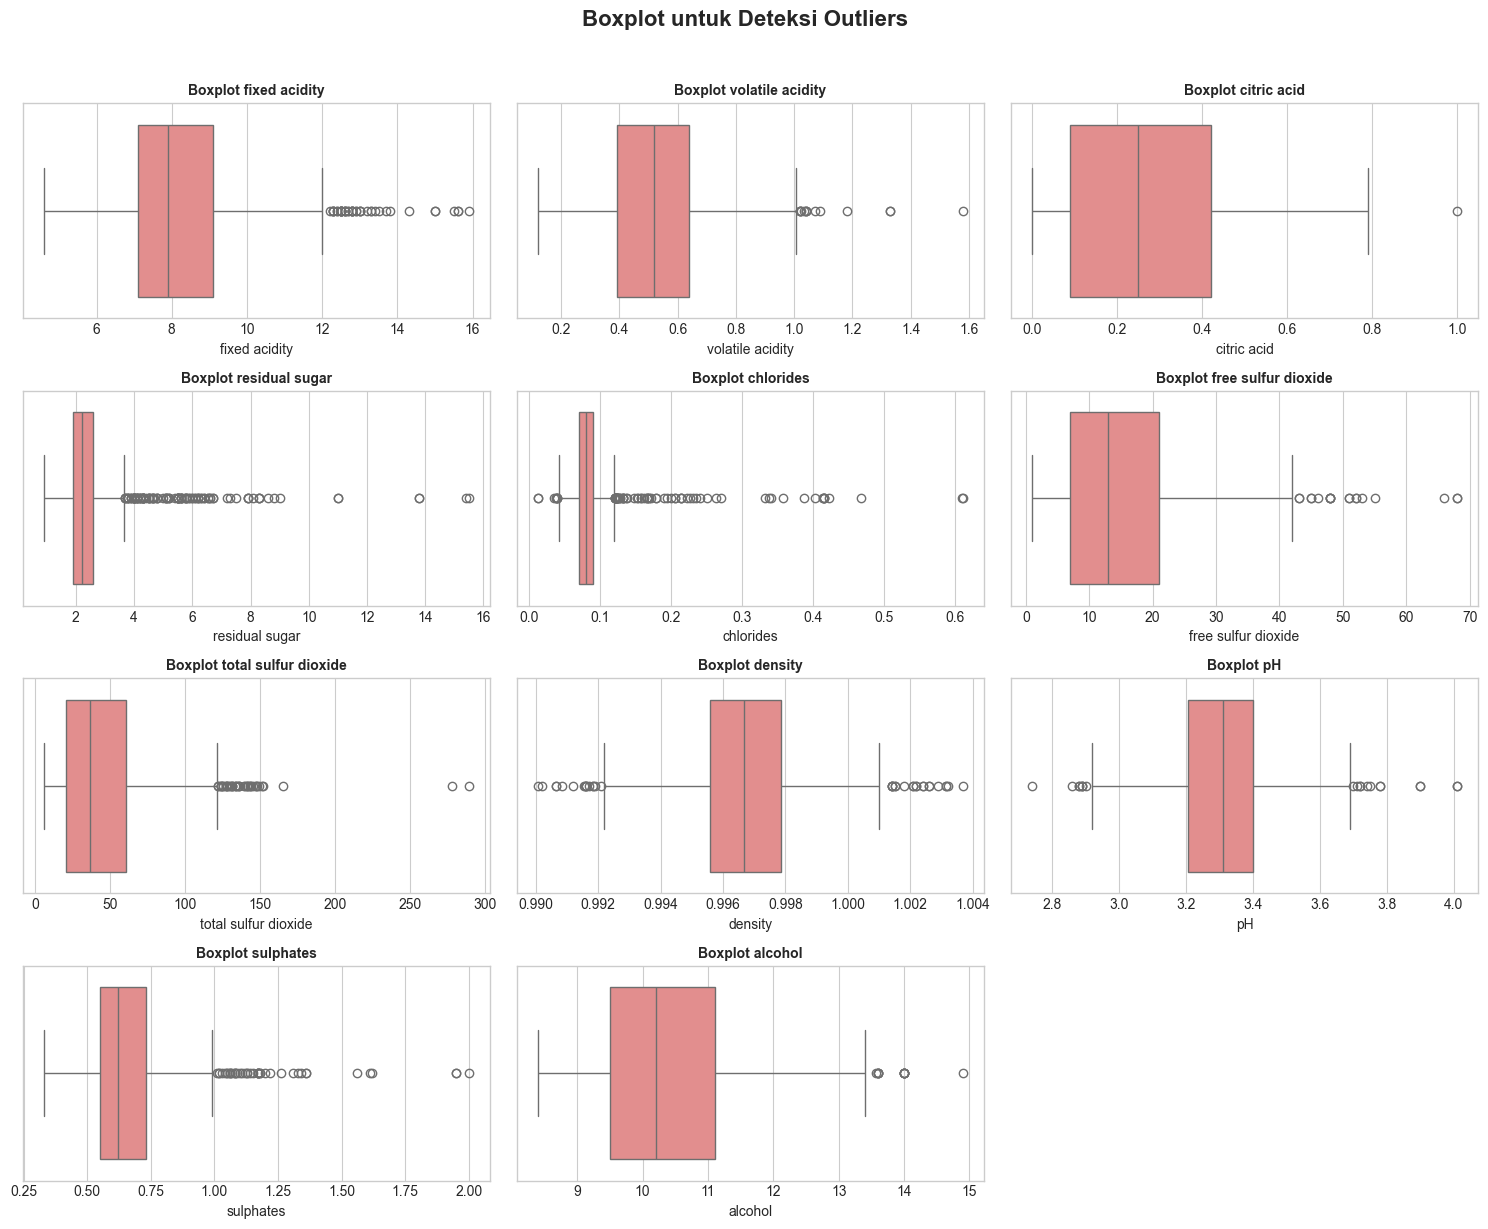

In [10]:
# Boxplot untuk deteksi outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot {col}', fontsize=10, fontweight='bold')

axes[-1].axis('off')

plt.suptitle('Boxplot untuk Deteksi Outliers', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Hitung jumlah outliers menggunakan IQR method
print("=" * 60)
print("DETEKSI OUTLIERS (IQR Method)")
print("=" * 60)

def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []
for col in numeric_features:
    count, lower, upper = count_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Outliers': count,
        'Percentage': f'{(count/len(df))*100:.2f}%',
        'Lower Bound': f'{lower:.3f}',
        'Upper Bound': f'{upper:.3f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

DETEKSI OUTLIERS (IQR Method)
             Feature  Outliers Percentage Lower Bound Upper Bound
       fixed acidity        44      3.85%       4.100      12.100
    volatile acidity        14      1.22%       0.021       1.011
         citric acid         1      0.09%      -0.405       0.915
      residual sugar       110      9.62%       0.850       3.650
           chlorides        77      6.74%       0.040       0.120
 free sulfur dioxide        18      1.57%     -14.000      42.000
total sulfur dioxide        40      3.50%     -39.000     121.000
             density        36      3.15%       0.992       1.001
                  pH        20      1.75%       2.913       3.692
           sulphates        43      3.76%       0.280       1.000
             alcohol        12      1.05%       7.100      13.500


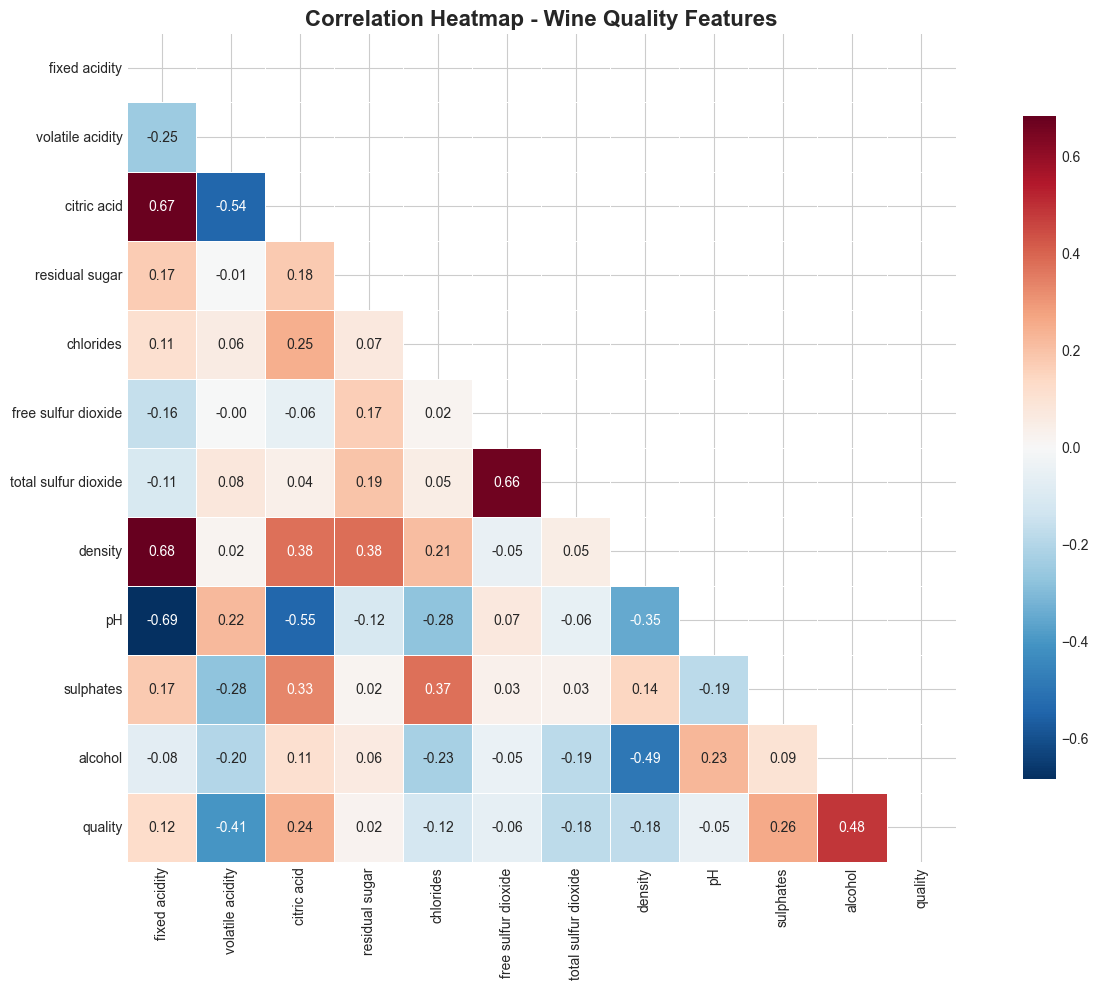

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 10))

# Exclude kolom Id
corr_df = df.drop('Id', axis=1)
correlation_matrix = corr_df.corr()

# Heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            mask=mask, center=0, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap - Wine Quality Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

KORELASI FITUR DENGAN QUALITY (TARGET)
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


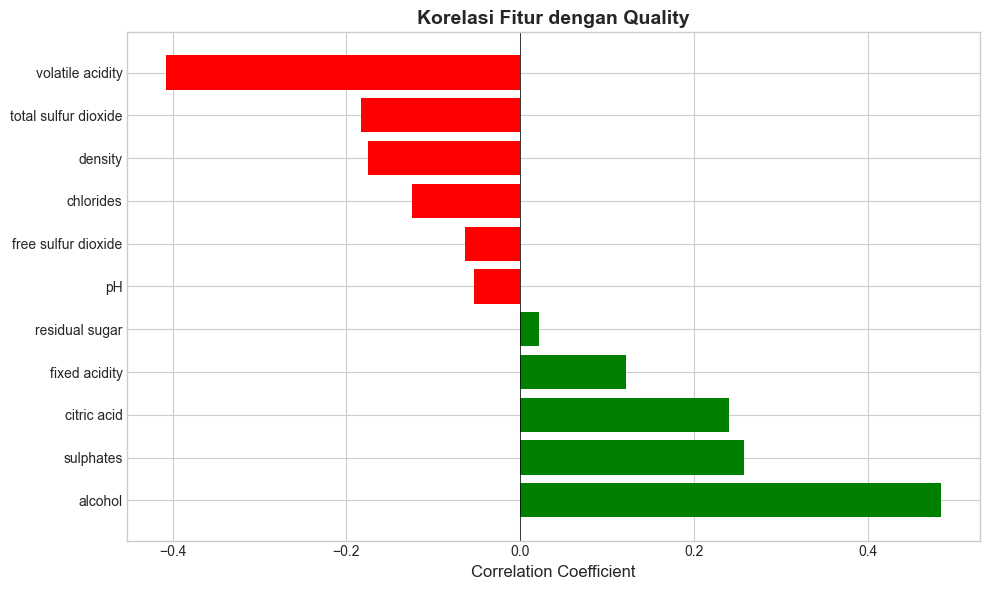

In [13]:
# Korelasi dengan target (quality)
print("=" * 60)
print("KORELASI FITUR DENGAN QUALITY (TARGET)")
print("=" * 60)
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)
print(quality_corr)

# Visualisasi
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in quality_corr.values]
plt.barh(quality_corr.index, quality_corr.values, color=colors)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Korelasi Fitur dengan Quality', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

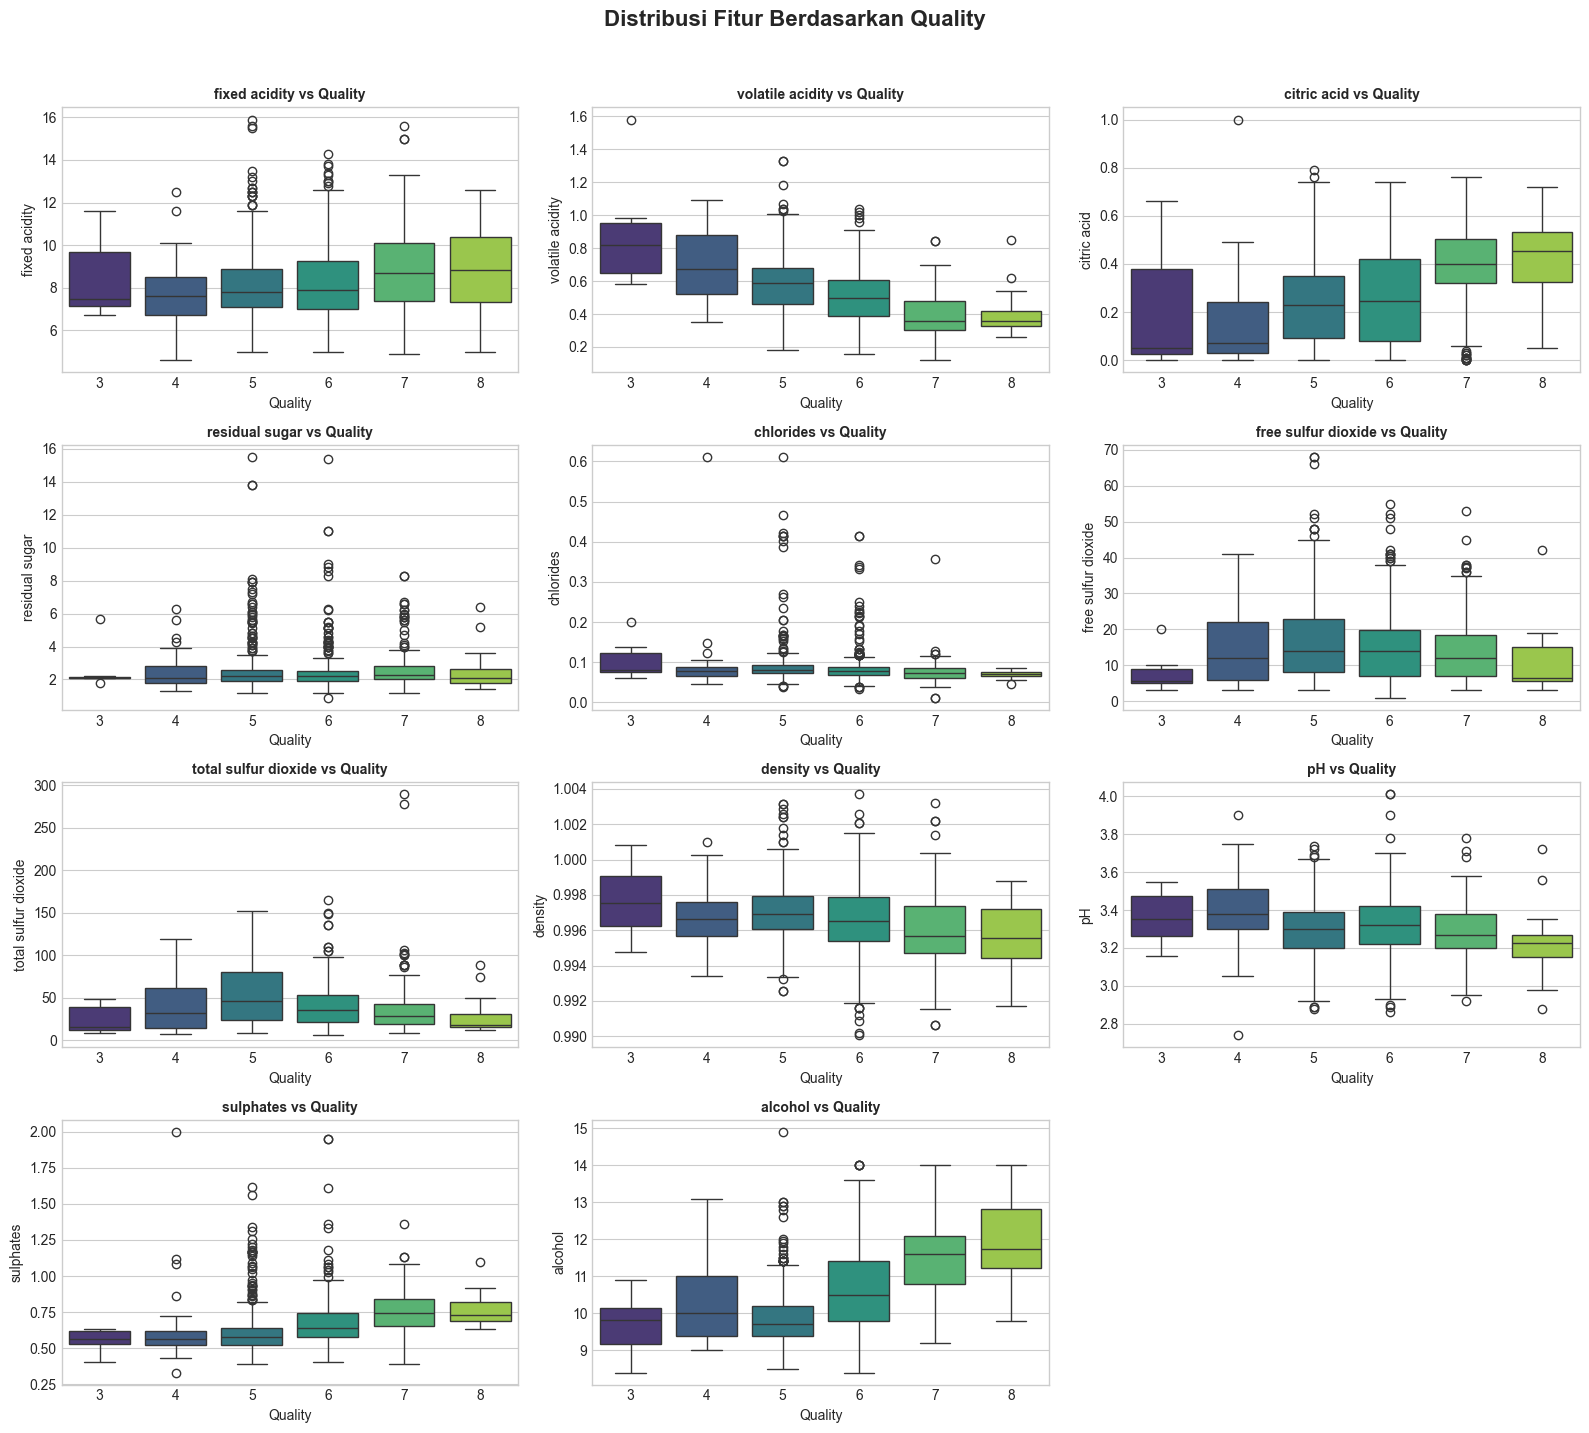

In [14]:
# Boxplot fitur terhadap quality
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, x='quality', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Quality', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(col)

axes[-1].axis('off')

plt.suptitle('Distribusi Fitur Berdasarkan Quality', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
# Copy dataframe untuk preprocessing
df_processed = df.copy()

# Drop kolom Id
print("=" * 60)
print("DROP KOLOM ID")
print("=" * 60)
print(f"Shape sebelum: {df_processed.shape}")
df_processed = df_processed.drop('Id', axis=1)
print(f"Shape sesudah: {df_processed.shape}")
print(f"Kolom yang tersisa: {list(df_processed.columns)}")

DROP KOLOM ID
Shape sebelum: (1143, 13)
Shape sesudah: (1143, 12)
Kolom yang tersisa: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [16]:
# Hapus duplikat
print("=" * 60)
print("MENGHAPUS DATA DUPLIKAT")
print("=" * 60)
print(f"Jumlah baris sebelum: {len(df_processed)}")
df_processed = df_processed.drop_duplicates()
print(f"Jumlah baris sesudah: {len(df_processed)}")
print(f"Baris yang dihapus: {len(df) - len(df_processed)}")

MENGHAPUS DATA DUPLIKAT
Jumlah baris sebelum: 1143
Jumlah baris sesudah: 1018
Baris yang dihapus: 125


In [17]:
# Handling outliers menggunakan IQR capping (Winsorization)
print("=" * 60)
print("HANDLING OUTLIERS (IQR Capping)")
print("=" * 60)

def cap_outliers_iqr(df, column):
    """Cap outliers menggunakan IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping ke semua fitur numerik
features_to_cap = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

for col in features_to_cap:
    df_processed = cap_outliers_iqr(df_processed, col)

print("Outliers berhasil di-cap menggunakan IQR method")
print(f"\nShape data setelah handling outliers: {df_processed.shape}")

HANDLING OUTLIERS (IQR Capping)
Outliers berhasil di-cap menggunakan IQR method

Shape data setelah handling outliers: (1018, 12)


In [18]:
# Memisahkan fitur (X) dan target (y)
print("=" * 60)
print("MEMISAHKAN FEATURES DAN TARGET")
print("=" * 60)

X = df_processed.drop('quality', axis=1)
y = df_processed['quality']

print(f"Shape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")
print(f"\nFitur yang digunakan: {list(X.columns)}")
print(f"\nDistribusi target:\n{y.value_counts().sort_index()}")

MEMISAHKAN FEATURES DAN TARGET
Shape X (features): (1018, 11)
Shape y (target): (1018,)

Fitur yang digunakan: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Distribusi target:
quality
3      6
4     33
5    433
6    409
7    122
8     15
Name: count, dtype: int64


In [19]:
# Split data menjadi training dan testing set
print("=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Menjaga proporsi kelas
)

print(f"Training set size: {X_train.shape[0]} sampel ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} sampel ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nDistribusi target di training set:\n{y_train.value_counts().sort_index()}")
print(f"\nDistribusi target di testing set:\n{y_test.value_counts().sort_index()}")

TRAIN-TEST SPLIT
Training set size: 814 sampel (80.0%)
Testing set size: 204 sampel (20.0%)

Distribusi target di training set:
quality
3      5
4     26
5    346
6    327
7     98
8     12
Name: count, dtype: int64

Distribusi target di testing set:
quality
3     1
4     7
5    87
6    82
7    24
8     3
Name: count, dtype: int64


In [20]:
# Standardisasi fitur
print("=" * 60)
print("FEATURE SCALING (StandardScaler)")
print("=" * 60)

scaler = StandardScaler()

# Fit pada training data, transform pada training dan testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaling berhasil diterapkan!")
print(f"\nStatistik X_train setelah scaling:")
print(f"Mean (seharusnya ~0): {X_train_scaled.mean().mean():.6f}")
print(f"Std (seharusnya ~1): {X_train_scaled.std().mean():.6f}")

FEATURE SCALING (StandardScaler)
Scaling berhasil diterapkan!

Statistik X_train setelah scaling:
Mean (seharusnya ~0): 0.000000
Std (seharusnya ~1): 1.000615


In [21]:
# Preview data setelah scaling
print("=" * 60)
print("PREVIEW DATA SETELAH SCALING")
print("=" * 60)
X_train_scaled.head()

PREVIEW DATA SETELAH SCALING


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
584,2.378144,-0.136675,1.428504,0.758464,-0.511764,-0.878789,-0.718981,1.846184,-1.451666,0.234749,0.439485
127,0.328946,0.498481,-0.680865,0.102974,-0.792627,-0.568449,-0.131904,0.082926,-0.790359,-0.441660,-0.856510
465,0.887818,0.152032,-0.526521,0.922336,0.330825,0.466019,0.226865,1.999511,-1.121013,-0.291347,-0.949081
963,-1.347671,-1.060537,-0.114936,-0.880261,0.162307,-1.189130,-0.588520,-1.154640,0.333862,-1.569009,-0.301083
811,-0.043636,-1.868917,0.811128,0.266846,-0.287074,1.603933,0.161635,-0.015641,1.458084,1.211784,-0.023370


In [22]:
# Gabungkan X dan y untuk disimpan
print("=" * 60)
print("MENYIMPAN DATA PREPROCESSING")
print("=" * 60)

# Training data
train_data = X_train_scaled.copy()
train_data['quality'] = y_train.values

# Testing data
test_data = X_test_scaled.copy()
test_data['quality'] = y_test.values

# Simpan ke CSV
train_data.to_csv('WineQT_train.csv', index=False)
test_data.to_csv('WineQT_test.csv', index=False)

# Simpan juga data gabungan
all_data = pd.concat([train_data, test_data], axis=0)
all_data.to_csv('WineQT_preprocessing.csv', index=False)

print(f"Training data saved: WineQT_train.csv ({len(train_data)} rows)")
print(f"Testing data saved: WineQT_test.csv ({len(test_data)} rows)")
print(f"All preprocessed data saved: WineQT_preprocessing.csv ({len(all_data)} rows)")

MENYIMPAN DATA PREPROCESSING
Training data saved: WineQT_train.csv (814 rows)
Testing data saved: WineQT_test.csv (204 rows)
All preprocessed data saved: WineQT_preprocessing.csv (1018 rows)


In [23]:
# Simpan juga scaler untuk digunakan nanti
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved: scaler.pkl")

Scaler saved: scaler.pkl


In [24]:
# Summary akhir
print("=" * 60)
print("SUMMARY PREPROCESSING")
print("=" * 60)
print(f"Dataset awal: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Dataset setelah preprocessing: {len(all_data)} baris, {all_data.shape[1]} kolom")
print(f"\nTraining samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
print(f"\nFitur yang digunakan ({len(X.columns)}): {list(X.columns)}")
print(f"Target: quality (nilai {y.min()} - {y.max()})")
print("\n" + "=" * 60)
print("PREPROCESSING SELESAI!")
print("=" * 60)

SUMMARY PREPROCESSING
Dataset awal: 1143 baris, 13 kolom
Dataset setelah preprocessing: 1018 baris, 12 kolom

Training samples: 814
Testing samples: 204

Fitur yang digunakan (11): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target: quality (nilai 3 - 8)

PREPROCESSING SELESAI!
